# Лабораторная работа по заданию №  3. Алгоритмы безусловной нелинейной оптимизации. Методы первого и второго порядка

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy.optimize import minimize, leastsq, brute, fmin

## Генерация данных

Alpha - 0.8418292031142204
Beta - 0.4210383926052742


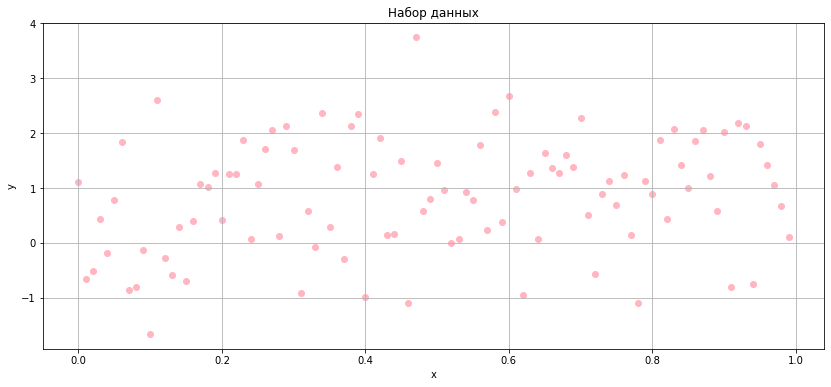

In [39]:
alpha = random.random()
beta = random.random()
print('Alpha -', alpha)
print('Beta -', beta)

y_list = []
x_list = []
for k in range(0,100):
    x = k/100
    q = random.normalvariate(0, 1)
    y = alpha*x + beta + q
    y_list.append(y)
    x_list.append(x)
x_list = np.array(x_list)
y_list = np.array(y_list)

plt.rcParams['figure.figsize'] = [14, 6]
plt.scatter(x_list, y_list, color='#FFB6C1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Набор данных')
plt.grid()
plt.show()

### Функции аппроксимации

In [40]:
def linear_error(params):
    a = params[0]
    b = params[1]
    return(sum(((a*x_list + b) - y_list) ** 2))

def rational_error(params):
    a = params[0]
    b = params[1]
    return(sum(((a/(1 + b*x_list)) - y_list) ** 2))

### Реализованные вручную функции

In [41]:
# Градиентный спуск
def gradient_descent(function, x0, E, step = 0.0001):  
    grad = nd.Gradient(function)(x0) 
    x1 = x0 - step * grad 
    iteration = 1 
    grad_calculations = 1
    while True:
        if (abs(x1[0] - x0[0]) > E) or (abs(x1[1] - x0[1]) > E):
            x0 = x1 
            grad = nd.Gradient(function)(x0)
            x1 = x0 - step * grad 
            grad_calculations += 1 
            iteration += 1    
        else: 
            break
    a_opt = x1[0]
    b_opt = x1[1]
    return(a_opt, b_opt, iteration, grad_calculations)

# Метод Ньютона
def newton_optimization(function, x0, E = 0.001):
    grad = nd.Gradient(function)(x0) 
    hess = nd.Hessian(function)(x0) 
    hess_inverted = np.linalg.inv(hess) 
    x1 = x0 - np.dot(hess_inverted, grad)
    iteration = 1

    while True:
        if (abs(x1[0] - x0[0]) > E) or (abs(x1[1] - x0[1]) > E): 
            x0 = x1 
            grad = nd.Gradient(function)(x0) 
            hess = nd.Hessian(function)(x0)
            hess_inverted = np.linalg.inv(hess) 
            x1 = x0 - np.dot(hess_inverted, grad) 
            iteration += 1
        else:
            break
    a_opt = x1[0]
    b_opt = x1[1]
    return(a_opt, b_opt, iteration)

## Аппроксимация рациональной функцией

In [42]:
x0 = [0.5, -0.5]

print('Метод градиентного спуска')
a_rat_grad, b_rat_grad, iteration_rat, grad_calc_rat = gradient_descent(rational_error, x0, E = 0.001) 
print("Iterations - ", iteration_rat) 
print("Gradient evaluations - ", grad_calc_rat)
print('a: ', a_rat_grad)
print('b: ', b_rat_grad,'\n')

print('Метод сопряженных градиентов')
rational_results = minimize(rational_error, x0, method='CG', options={'disp': True})
a_rat_CDS = rational_results.x[0]
b_rat_CDS = rational_results.x[1]
print('a: ', a_rat_CDS)
print('b: ', b_rat_CDS,'\n')

print('Метод Ньютона')
a_rat_N, b_rat_N, iteration_rat = newton_optimization(rational_error, x0) 
print("Iterations - ", iteration_rat) 
print('a: ', a_rat_N)
print('b: ', b_rat_N,'\n')

#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_rat_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    return((a/(1 + b*np.array(x))) - np.array(y))

res=leastsq(sq_function_rat_for_lm, x0, args=(x_list, y_list), full_output = True)
lm_rat=res[0]
lm_rat_approx_array=[lm_rat[0]*x+lm_rat[1] for x in x_list]
print('Метод Левенберга-Марквардта')
print('a: ', lm_rat[0])
print('b: ', lm_rat[1])
print('Calculations: '+str(res[2]['nfev'])+'\n')

Метод градиентного спуска
Iterations -  29
Gradient evaluations -  29
a:  0.5669387500174141
b:  -0.532906416639005 

Метод сопряженных градиентов
Optimization terminated successfully.
         Current function value: 104.051082
         Iterations: 8
         Function evaluations: 54
         Gradient evaluations: 18
a:  0.6083047442277181
b:  -0.5016215206702351 

Метод Ньютона
Iterations -  6
a:  0.6083048300349467
b:  -0.5016214190085806 

Метод Левенберга-Марквардта
a:  0.6083242845228943
b:  -0.5015891262361964
Calculations: 13



<ipython-input-40-536216d39606>:9: RuntimeWarning: divide by zero encountered in true_divide
  return(sum(((a/(1 + b*x_list)) - y_list) ** 2))
<ipython-input-40-536216d39606>:9: RuntimeWarning: divide by zero encountered in true_divide
  return(sum(((a/(1 + b*x_list)) - y_list) ** 2))
<ipython-input-40-536216d39606>:9: RuntimeWarning: divide by zero encountered in true_divide
  return(sum(((a/(1 + b*x_list)) - y_list) ** 2))
C:\Users\Julia\.conda\envs\geoenv3\lib\site-packages\numdifftools\core.py:896: RuntimeWarning: invalid value encountered in double_scalars
  hess[i, j] = (f(x + ee[i, :] + ee[j, :])


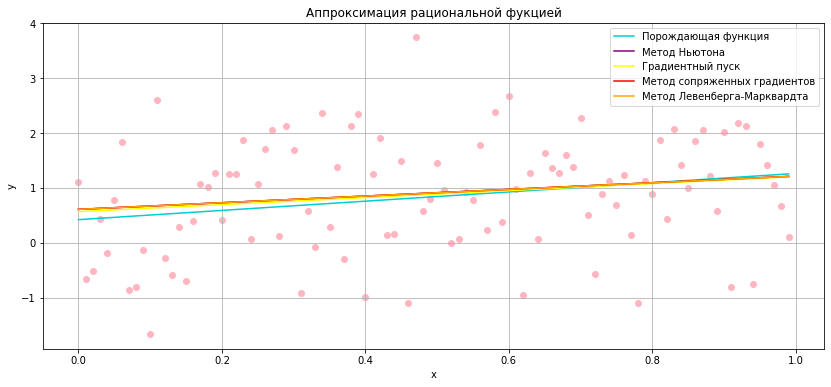

In [43]:
x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, color='#FFB6C1')
plt.plot(x_list, [el*alpha+beta for el in x_list], color='DarkTurquoise', label='Порождающая функция')
plt.plot(x, a_rat_N/(1 + b_rat_N*x), c='purple', label = 'Метод Ньютона')
plt.plot(x, a_rat_grad/(1 + b_rat_grad*x), c='yellow', label = 'Градиентный пуск')
plt.plot(x, a_rat_CDS/(1 + b_rat_CDS*x), c='red',  label = 'Метод сопряженных градиентов')
plt.plot(x, lm_rat[0]/(1 + lm_rat[1]*x), c='orange', label = 'Метод Левенберга-Марквардта')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация рациональной фукцией')
plt.legend()
plt.grid()
plt.show()

## Аппроксимация линейной функцией

In [44]:
x0 = [0.5, -0.5]
print('\nИсходные параметры:\na='+str(alpha)+', b='+str(beta))

print('Метод градиентного спуска')
a_lin_grad, b_lin_grad, iteration_lin, grad_calc_lin = gradient_descent(linear_error, x0, E = 0.001) 
print("Iterations - ", iteration_lin) 
print("Gradient evaluations - ", grad_calc_lin)
print('a: ', a_lin_grad)
print('b: ', b_lin_grad,'\n')

print('Метод сопряженных градиентов')
linear_results = minimize(linear_error, x0, method='CG', options={'disp': True})
a_lin_CDS = linear_results.x[0]
b_lin_CDS = linear_results.x[1]
print('a: ', a_lin_CDS)
print('b: ', b_lin_CDS,'\n')

print('Метод Ньютона')
a_lin_N, b_lin_N, iteration_lin = newton_optimization(linear_error, x0) 
print("Iterations - ", iteration_lin) 
print('a: ', a_lin_N)
print('b: ', b_lin_N,'\n')

#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_lin_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    return((a*np.array(x) + b) - np.array(y))

res=leastsq(sq_function_lin_for_lm, x0, args=(x_list, y_list), full_output = True)
lm_lin=res[0]
lm_lin_approx_array=[lm_lin[0]*x+lm_lin[1] for x in x_list]
print('Метод Левенберга-Марквардта')
print('a: ', lm_lin[0])
print('b: ', lm_lin[1])
print('Calculations: '+str(res[2]['nfev'])+'\n')


Исходные параметры:
a=0.8418292031142204, b=0.4210383926052742
Метод градиентного спуска
Iterations -  126
Gradient evaluations -  126
a:  0.9117374485069212
b:  0.3362281822713268 

Метод сопряженных градиентов
Optimization terminated successfully.
         Current function value: 102.687926
         Iterations: 6
         Function evaluations: 42
         Gradient evaluations: 14
a:  0.7942852368083373
b:  0.4422706932388521 

Метод Ньютона
Iterations -  2
a:  0.7942851292904582
b:  0.44227074118822157 

Метод Левенберга-Марквардта
a:  0.7942851340063887
b:  0.4422707346639218
Calculations: 10



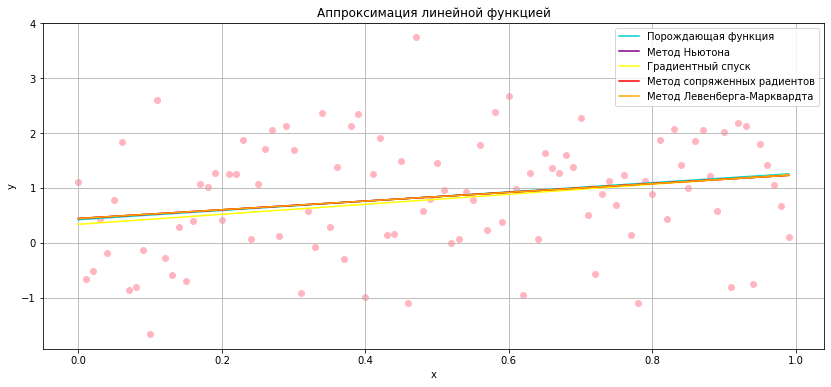

In [46]:
x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, color='#FFB6C1')
plt.plot(x_list, [el*alpha+beta for el in x_list], color='DarkTurquoise', label='Порождающая функция')
plt.plot(x, a_lin_N*x + b_lin_N, c='purple', label = 'Метод Ньютона')
plt.plot(x, a_lin_grad*x + b_lin_grad, c='yellow', label = 'Градиентный спуск')
plt.plot(x, a_lin_CDS*x + b_lin_CDS, c='red', label = 'Метод сопряженных радиентов')
plt.plot(x, lm_lin[0]*x + lm_lin[1], c='orange', label = 'Метод Левенберга-Марквардта')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация линейной функцией')
plt.legend()
plt.grid()
plt.show()